# Linear Regression


> ### $\hat y = a + b*X$
    b = coefficient
    a = intercept

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# working on a car dataset which contains
- speed(mph)
- stopping distance (ft)

In [2]:
sns.set(color_codes=True)

In [2]:
cars = pd.read_csv('./dataset/cars.csv')
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
speed    50 non-null int64
dist     50 non-null int64
dtypes: int64(2)
memory usage: 880.0 bytes


### Discriptive Stats

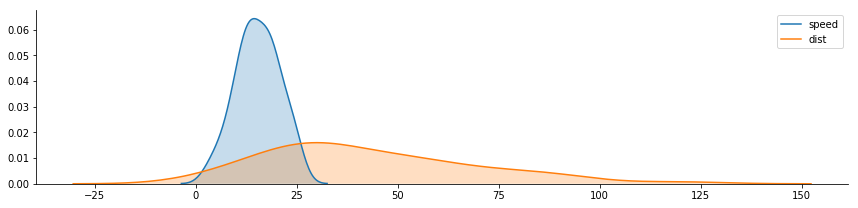

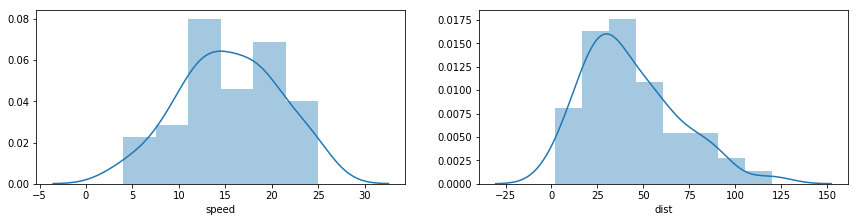

In [4]:
sns.FacetGrid(data=cars, aspect = 4)
sns.kdeplot(data=cars['speed'],shade=True)
sns.kdeplot(data=cars['dist'],shade=True)


In [5]:
cars.keys()

Index(['speed', 'dist'], dtype='object')

In [6]:
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


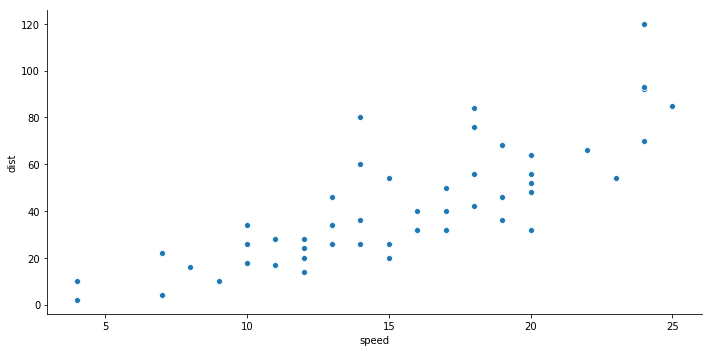

In [18]:
sns.relplot('speed','dist',data=cars,kind='scatter',aspect=2)
plt.show()

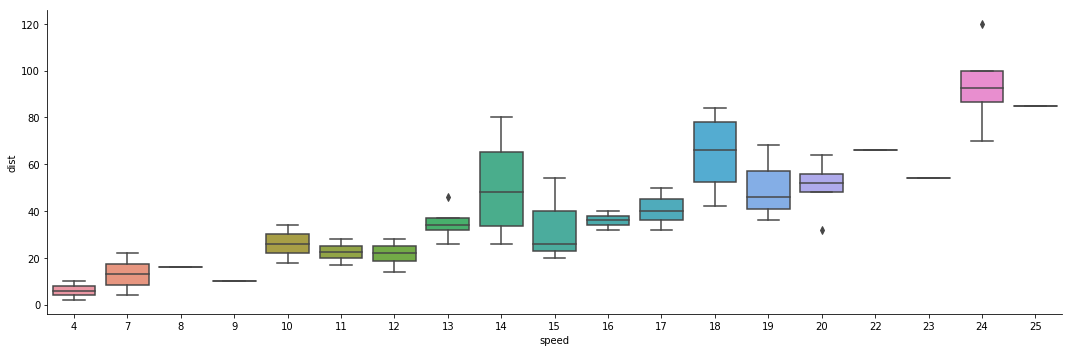

In [17]:
sns.catplot('speed','dist',data=cars,kind='box',aspect=3)
plt.show()

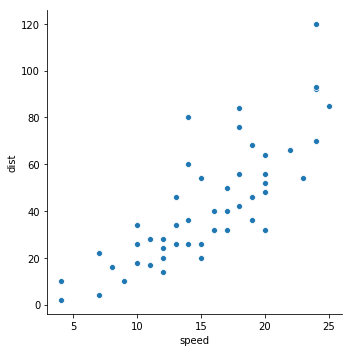

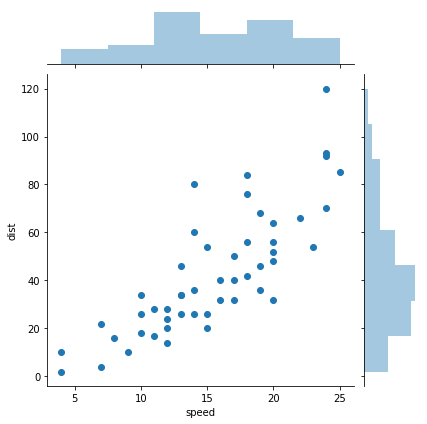

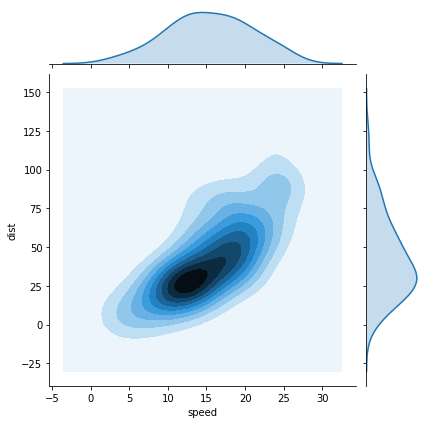

In [7]:
#join plot
sns.relplot('speed','dist',data=cars,kind='scatter')
plt.show()

sns.jointplot('speed','dist',data=cars,kind='scatter')
plt.show()

sns.jointplot('speed','dist',data=cars,kind='kde')
plt.show()

In [8]:
import statsmodels.formula.api as smf

In [9]:
cars.keys()

Index(['speed', 'dist'], dtype='object')

In [12]:
model = smf.ols(formula="dist~speed",data=cars)
results = model.fit()

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           1.49e-12
Time:                        22:42:06   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.0

In [32]:
model1 = smf.ols(formula="dist~speed+0",data=cars)
results1 = model1.fit()

In [33]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     423.5
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           9.23e-26
Time:                        22:49:18   Log-Likelihood:                -209.87
No. Observations:                  50   AIC:                             421.7
Df Residuals:                      49   BIC:                             423.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          2.9091      0.141     20.578      0.0

# Covariance

In [14]:
cars.cov()

,speed,dist
speed,27.959184,109.946939
dist,109.946939,664.060816


>### Correlation coefficient (*r* )

In [15]:
cars.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


In [16]:
results.params

Intercept   -17.579095
speed         3.932409
dtype: float64

In [17]:
results.rsquared

0.6510793807582509

In [18]:
import statsmodels.api as sm

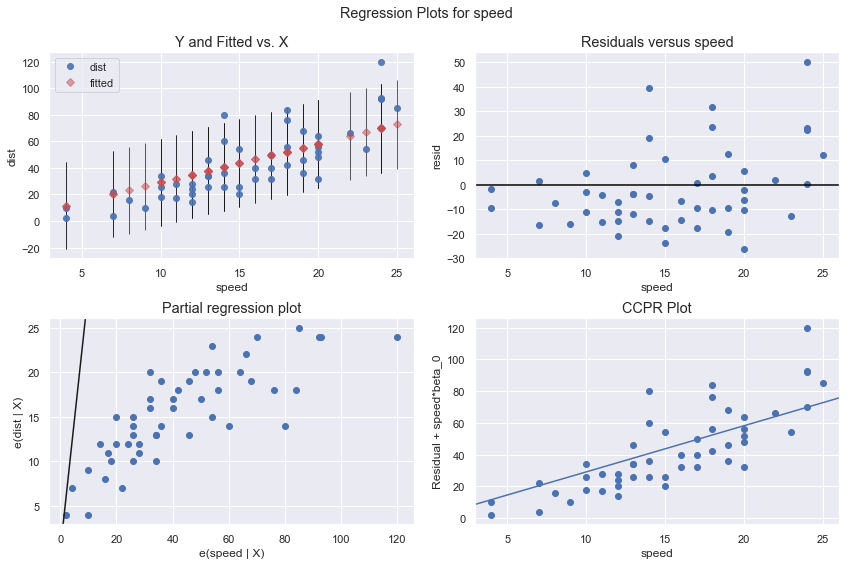

In [34]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results1,'speed',fig=fig)

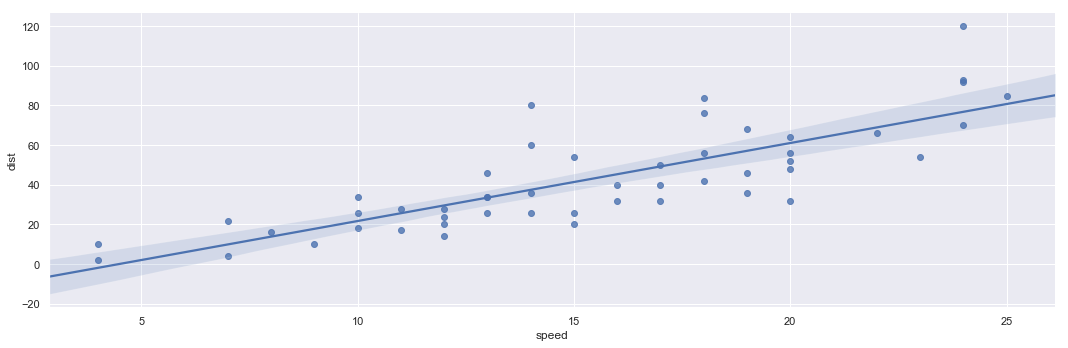

In [43]:
sns.lmplot(x='speed',y='dist',data=cars,aspect=3)